# Maze Search Solution

## Import Maze File

In [1]:
# read file
filename = "maze2.txt"
with open(filename) as f:
    contents = f.read()

# validate start and goal
print(f"Number of starts {contents.count('A')}")
print(f"Number of goals {contents.count('B')}")

# format maze in list
contents = contents.splitlines()

for i in range(len(contents)):
    print(contents[i])

Number of starts 1
Number of goals 1
###                 #########
#   ###################   # #
# ####                # # # #
# ################### # # # #
#                     # # # #
##################### # # # #
#   ##                # # # #
# # ## ### ## ######### # # #
# #    #   ##B#         # # #
# # ## ################ # # #
### ##             #### # # #
### ############## ## # # # #
###             ##    # # # #
###### ######## ####### # # #
###### ####             #   #
A      ######################


## Defining Maze Properties 

In [2]:
# determine height and width of maze
height = len(contents)
width = max([len(line) for line in contents])
print(height, width)

16 29


In [3]:
# determine object of walls
walls = []
for i in range(height):
    row = []
    for j in range(width):
        try:
            if contents[i][j] == "A":
                start = (i,j)
                row.append(False)
            elif contents[i][j] == "B":
                goal = (i,j)
                row.append(False)
            elif contents[i][j] == " ":
                row.append(False)
            else:
                row.append(True)
        except IndexError:
            row.append(False)
    walls.append(row)

print(start, goal)

(15, 0) (8, 13)


## Solving Maze with Search Algorithms

In [4]:
# choose search strategy:
strategies = {1:"DFS", 2:"BFS"}
strategy = 2
print(f"Search Strategy: {strategies[strategy]}")

# track number of states
num_explored = 0

# create object to store node properties
node_obj = {}

# define node from start start
node = {}
node["state"] = start
node["parent"] = None
node["action"] = None
node_obj[node["state"]] = node

# define frontier and explored object
frontier = []
explored = []

# save start node in frontier
frontier.append(node["state"])

while True:
    print("========== Start Loop ============")
    
    # check if there is a next state
    if len(frontier) == 0:
        print("no solution")
        break

    # choose a node from the frontier
    print(f"Current Frontier: {frontier}")
    if strategies[strategy] == "DFS":     
        node_state = frontier[-1]
        node = node_obj[node_state]
        frontier = frontier[:-1]
    elif strategies[strategy] == "BFS":
        node_state = frontier[0]
        node = node_obj[node_state]
        frontier = frontier[1:]
    else:
        print("Search Strategy Invalid")
        solution = None
        break

    num_explored += 1
    print(f"Frontier size: {len(frontier)}")

    # check if the node is the goal
    if node["state"] == goal:
        print("********* Solution find! **************")
        actions = []
        cells = []
        while node["parent"] is not None:
            actions.append(node["action"])
            cells.append(node["state"])
            node = node_obj[node["parent"]]
        actions.reverse()
        cells.reverse()
        solution = (actions, cells)
        print(f"Actions: {actions}")
        print(f"Cells: {cells}")
        break

    # storage node as explored
    explored.append(node["state"])
    print(f"Current explored states: {explored}")

    # add neighbors to the frontier
    row, col = node["state"]
    candidates = [
        ("up", (row - 1, col)),
        ("down", (row + 1, col)),
        ("left", (row, col - 1)),
        ("right", (row, col + 1))
    ]

    node_neighbors = {}
    for action, (r, c) in candidates:
        if 0 <= r < height and 0 <= c < width and not walls[r][c]:
            node_neighbors = {}
            node_neighbors["state"] = (r,c)
            node_neighbors["parent"] = node["state"]
            node_neighbors["action"] = action
            print(f"State neighbors: {node_neighbors['state']}")
            if node_neighbors["state"] not in explored:
                frontier.append(node_neighbors['state'])
                node_obj[node_neighbors["state"]] = node_neighbors

    print(num_explored)
    print(f"Last Frontier: {frontier}")

    print(node["state"])
    print(node_obj)
    
    if num_explored > 20:
        unfinished_search = False

Search Strategy: BFS
========== Start Loop ============
Current Frontier: [(15, 0)]
Frontier size: 0
Current explored states: [(15, 0)]
State neighbors: (15, 1)
1
Last Frontier: [(15, 1)]
(15, 0)
{(15, 0): {'state': (15, 0), 'parent': None, 'action': None}, (15, 1): {'state': (15, 1), 'parent': (15, 0), 'action': 'right'}}
========== Start Loop ============
Current Frontier: [(15, 1)]
Frontier size: 0
Current explored states: [(15, 0), (15, 1)]
State neighbors: (15, 0)
State neighbors: (15, 2)
2
Last Frontier: [(15, 2)]
(15, 1)
{(15, 0): {'state': (15, 0), 'parent': None, 'action': None}, (15, 1): {'state': (15, 1), 'parent': (15, 0), 'action': 'right'}, (15, 2): {'state': (15, 2), 'parent': (15, 1), 'action': 'right'}}
========== Start Loop ============
Current Frontier: [(15, 2)]
Frontier size: 0
Current explored states: [(15, 0), (15, 1), (15, 2)]
State neighbors: (15, 1)
State neighbors: (15, 3)
3
Last Frontier: [(15, 3)]
(15, 2)
{(15, 0): {'state': (15, 0), 'parent': None, 'action

In [5]:
solution = solution[1] if solution is not None else None
for i, row in enumerate(walls):
    for j, col in enumerate(row):
        if col:
            print("█", end="")
        elif (i,j) == start:
            print("A", end="")
        elif (i,j) == goal:
            print("B", end="")
        elif solution is not None and (i,j) in solution:
            print("*", end="")
        else:
            print(" ", end="")
    print()
print()

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██********        █ █ █ █
█ █ ██*███ ██*█████████ █ █ █
█ █****█   ██B█         █ █ █
█ █*██ ████████████████ █ █ █
███*██             ████ █ █ █
███*██████████████ ██ █ █ █ █
███****         ██    █ █ █ █
██████*████████ ███████ █ █ █
██████*████             █   █
A******██████████████████████



## Output Image

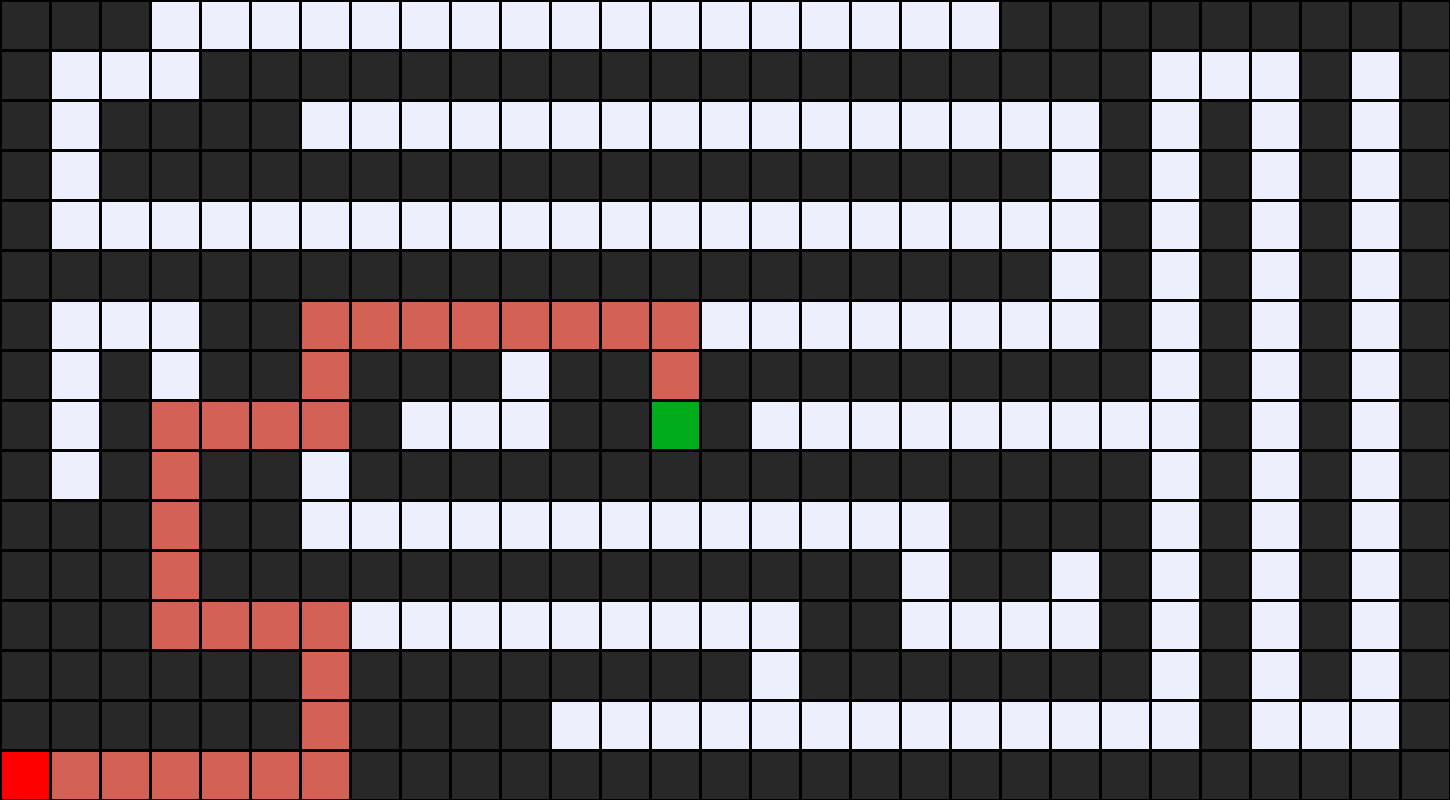

In [6]:
from PIL import Image, ImageDraw

show_solution = True
show_explored = True

cell_size = 50
cell_border = 2

# create a blank canvas
img = Image.new(
    "RGBA",
    (width * cell_size, height * cell_size),
    "black"
)

draw = ImageDraw.Draw(img)

for i,row in enumerate(walls):
    for j, col in enumerate(row):

        # Walls
        if col:
            fill = (40,40,40)

        # Start
        elif (i,j) == start:
            fill = (255,0,0)
        
        # Goal
        elif (i,j) == goal:
            fill = (0,171,28)

        # Solution
        elif solution is not None and (i,j) in solution and show_solution:
            fill = (212,97,85)

        # Explored
        elif solution is not None and (i,j) in explored and show_explored:
            fill = (237,240,252)

        # Empty
        else:
            fill = (237,240,252)

        # Draw cell
        draw.rectangle(
            
            ([(j * cell_size + cell_border, i * cell_size + cell_border),
            ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
            fill=fill
        )
    
img